In [107]:
%load_ext autoreload
%autoreload 2

import numpy as np
import image_recovery.linalg as irl
import image_recovery.imglib as iri

import scipy.linalg as splin

import matplotlib.pyplot as plt

import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# SVDs

# Pics

In [130]:
pic1 = iri.img2qm(os.path.join("test_pictures", "flowers0_small.jpg"))
pic2 = iri.img2qm(os.path.join("test_pictures", "parrot0_small.jpg"))

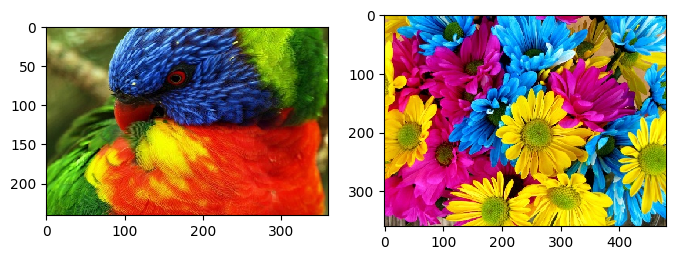

In [131]:
_, axs = plt.subplots(figsize=(8, 6), nrows=1, ncols=2, dpi=100)

axs[1].imshow(pic1[:, :, 1:])
axs[0].imshow(pic2[:, :, 1:])

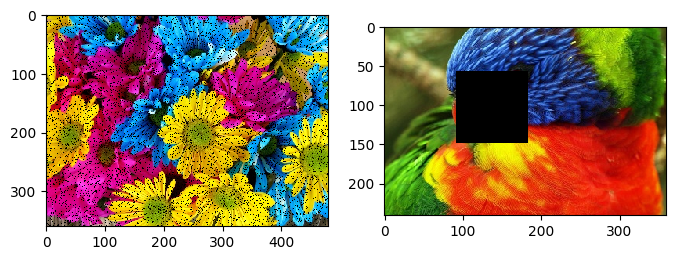

In [133]:
pic1_tainted, mask1 = iri.add_random_missing_pixels(pic1, 0.1, mode="uniform")
pic2_tainted, mask2 = iri.add_random_missing_pixels(pic2, 0.1, mode="square")

_, axs = plt.subplots(figsize=(8, 6), nrows=1, ncols=2, dpi=100)

axs[0].imshow(pic1_tainted[:, :, 1:])
axs[1].imshow(pic2_tainted[:, :, 1:])

# Testing H <==> C mapping

#### Additive isomorphism

In [5]:
n_tests = 5

for ix in range(n_tests):
    shape = np.random.randint(5, 100 + 1, size=2)
    
    A = np.random.normal(size=(*shape, 4))
    B = np.random.normal(size=(*shape, 4))
    print(f"Test {ix + 1}/{n_tests}. Q-matrices of shapes {A.shape}, {B.shape}")
    
    if np.allclose(irl.qm2cm(A) + irl.qm2cm(B), irl.qm2cm(A + B)):
        print("CORRECT\n")
    else:
        print("INCORRECT\n")

Test 1/5. Q-matrices of shapes (92, 99, 4), (92, 99, 4)
CORRECT

Test 2/5. Q-matrices of shapes (81, 34, 4), (81, 34, 4)
CORRECT

Test 3/5. Q-matrices of shapes (91, 37, 4), (91, 37, 4)
CORRECT

Test 4/5. Q-matrices of shapes (42, 58, 4), (42, 58, 4)
CORRECT

Test 5/5. Q-matrices of shapes (12, 14, 4), (12, 14, 4)
CORRECT



#### Multiplicative isomorphism

In [6]:
n_tests = 5

for ix in range(n_tests):
    shapes = np.random.randint(5, 100 + 1, size=3)
    
    A = np.random.normal(size=(*shapes[:-1], 4))
    B = np.random.normal(size=(*shapes[1:], 4))
    print(f"Test {ix + 1}/{n_tests}. Q-matrices of shapes {A.shape}, {B.shape}")
    
    if np.allclose(irl.qm2cm(A) @ irl.qm2cm(B), irl.qm2cm(irl.qdot(A, B))):
        print("CORRECT\n")
    else:
        print("INCORRECT\n")

Test 1/5. Q-matrices of shapes (82, 10, 4), (10, 21, 4)
CORRECT

Test 2/5. Q-matrices of shapes (93, 16, 4), (16, 90, 4)
CORRECT

Test 3/5. Q-matrices of shapes (73, 34, 4), (34, 35, 4)
CORRECT

Test 4/5. Q-matrices of shapes (86, 65, 4), (65, 81, 4)
CORRECT

Test 5/5. Q-matrices of shapes (56, 88, 4), (88, 18, 4)
CORRECT



#### Conjugation

In [7]:
n_tests = 5

for ix in range(n_tests):
    shape = np.random.randint(2, 2 + 1, size=2)
    
    A = np.random.randint(-2, 3, size=(*shape, 4))
    print(f"Test {ix + 1}/{n_tests}. Q-matrix of shape {A.shape}")
    
    if np.allclose(irl.qm2cm(irl.conjugate(A)), np.conj(irl.qm2cm(A))):
        print("CORRECT\n")
    else:
        print("INCORRECT\n")

Test 1/5. Q-matrix of shape (2, 2, 4)
INCORRECT

Test 2/5. Q-matrix of shape (2, 2, 4)
INCORRECT

Test 3/5. Q-matrix of shape (2, 2, 4)
INCORRECT

Test 4/5. Q-matrix of shape (2, 2, 4)
INCORRECT

Test 5/5. Q-matrix of shape (2, 2, 4)
INCORRECT



####  Frobenius norm

In [8]:
n_tests = 5

for ix in range(n_tests):
    shape = np.random.randint(5, 100 + 1, size=2)
    
    A = np.random.normal(size=(*shape, 4))
    print(f"Test {ix + 1}/{n_tests}. Q-matrix of shape {A.shape}")
    
    if np.isclose(np.linalg.norm(irl.qm2cm(A))**2, 2*irl.frobenius_norm(A)**2):
        print("CORRECT\n")
    else:
        print("INCORRECT\n")

Test 1/5. Q-matrix of shape (32, 66, 4)
CORRECT

Test 2/5. Q-matrix of shape (52, 61, 4)
CORRECT

Test 3/5. Q-matrix of shape (22, 63, 4)
CORRECT

Test 4/5. Q-matrix of shape (59, 28, 4)
CORRECT

Test 5/5. Q-matrix of shape (10, 100, 4)
CORRECT

